<a href="https://colab.research.google.com/github/namitasathish/Movie-recommendation-system-/blob/main/movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Data Collection

In [ ]:
data=pd.read_csv("/content/movies.csv")

In [ ]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
data.shape

(4803, 24)

#Feature Selection

In [ ]:
feature=["genres","keywords","tagline","cast","director"]
print(feature)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

Replacing null values

In [ ]:
for f in feature:
  data[f]=data[f].fillna("")

In [ ]:
data.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

Combining fields

In [ ]:
combined=data["genres"]+" "+data["keywords"]+" "+data["tagline"]+" "+data["cast"]+" "+data["director"]

In [ ]:
print(combined)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


#Textual data to Feature data

In [ ]:
vec=TfidfVectorizer()

In [ ]:
fvec=vec.fit_transform(combined)
print(fvec)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [ ]:
model=cosine_similarity(fvec)

In [ ]:
print(model)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
model.shape


(4803, 4803)

#User Interaction

In [ ]:
movie=input("Enter your favorite movie")

Enter your favorite movieironman


In [ ]:
allmovies=data["title"].tolist()

In [ ]:
print(allmovies)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
cmatch=difflib.get_close_matches(movie,allmovies)

In [ ]:
print(cmatch)

['Birdman', 'Iron Man', 'Hitman']


In [ ]:
closematch=cmatch[0]

In [ ]:
print(closematch)

Birdman


index of movie

In [ ]:
index=data[data.title==closematch]["index"].values[0]
print(index)

2334


#Getting list of simillar movies

In [ ]:
similarityscore=list(enumerate(model[index]))
print(similarityscore)

[(0, 0.01197786514546125), (1, 0.024889093650457314), (2, 0.0), (3, 0.019164395473404258), (4, 0.0), (5, 0.012408130527450528), (6, 0.014861866300457638), (7, 0.047413408084477145), (8, 0.046301615467016784), (9, 0.05864888062558872), (10, 0.041448299406387175), (11, 0.0), (12, 0.0), (13, 0.03128749803316471), (14, 0.0462762109636666), (15, 0.014018945927412131), (16, 0.06492678226543958), (17, 0.026550484817288954), (18, 0.04383435080791669), (19, 0.014342121709958952), (20, 0.0683474453402311), (21, 0.0), (22, 0.010817964290352918), (23, 0.007887132316192853), (24, 0.08983920215721228), (25, 0.0028934236258832064), (26, 0.033638253743915804), (27, 0.004154460686929251), (28, 0.004561107567588781), (29, 0.0), (30, 0.014951016491191267), (31, 0.008963797473188375), (32, 0.0), (33, 0.02946972449654809), (34, 0.0), (35, 0.01024493453416439), (36, 0.00923150357963087), (37, 0.03934412131788671), (38, 0.057820027727481516), (39, 0.004294985065153953), (40, 0.02342181679930078), (41, 0.0311

In [ ]:
len(similarityscore)

4803

score for simillar movies

In [ ]:

sortedm=sorted(similarityscore, key=lambda x:x[1],reverse=True)
print(sortedm)

[(2334, 1.0000000000000004), (2187, 0.2998155025057544), (176, 0.24213774422961998), (4089, 0.23142939087295436), (2133, 0.21907204840916583), (1462, 0.1652910915978594), (2356, 0.15262553142921276), (2276, 0.1318721942846826), (2086, 0.1301141340219753), (4014, 0.12962845272693396), (2629, 0.12560295877308605), (615, 0.12376496193719226), (4580, 0.12320799538467012), (174, 0.11836562703720376), (996, 0.11276027222690123), (1685, 0.1099355543367162), (3276, 0.1097962334785412), (3792, 0.10271371292563988), (2635, 0.10108185232931062), (4016, 0.09849578308468476), (3865, 0.0971674294002309), (234, 0.09641161678174084), (283, 0.09323044652409204), (1409, 0.09285730262046883), (427, 0.09187282794601656), (712, 0.09178380354974053), (2461, 0.09128404230225326), (3819, 0.08983927878281779), (24, 0.08983920215721228), (1055, 0.08916948766953589), (641, 0.08889335722786529), (3057, 0.08787930780811568), (2633, 0.08741824797337483), (321, 0.08725404504832059), (256, 0.08722249751580598), (3384

In [ ]:

print(type(sortedm))


del sortedm


sortedm=sorted(similarityscore, key=lambda x:x[1],reverse=True)
print(sortedm)

<class 'list'>
[(2334, 1.0000000000000004), (2187, 0.2998155025057544), (176, 0.24213774422961998), (4089, 0.23142939087295436), (2133, 0.21907204840916583), (1462, 0.1652910915978594), (2356, 0.15262553142921276), (2276, 0.1318721942846826), (2086, 0.1301141340219753), (4014, 0.12962845272693396), (2629, 0.12560295877308605), (615, 0.12376496193719226), (4580, 0.12320799538467012), (174, 0.11836562703720376), (996, 0.11276027222690123), (1685, 0.1099355543367162), (3276, 0.1097962334785412), (3792, 0.10271371292563988), (2635, 0.10108185232931062), (4016, 0.09849578308468476), (3865, 0.0971674294002309), (234, 0.09641161678174084), (283, 0.09323044652409204), (1409, 0.09285730262046883), (427, 0.09187282794601656), (712, 0.09178380354974053), (2461, 0.09128404230225326), (3819, 0.08983927878281779), (24, 0.08983920215721228), (1055, 0.08916948766953589), (641, 0.08889335722786529), (3057, 0.08787930780811568), (2633, 0.08741824797337483), (321, 0.08725404504832059), (256, 0.0872224975

printing the name of the movies

In [ ]:
print("Movies suggested for you: \n")
i=1
for movie in sortedm :
  index=movie[0]
  title=data[data.index==index]["title"].values[0]
  if(i<11):
    print (i,".",title)
    i+=1

Movies suggested for you: 

1 . Birdman
2 . 21 Grams
3 . The Revenant
4 . Amores perros
5 . Babel
6 . Biutiful
7 . Youth in Revolt
8 . The Painted Veil
9 . Home Alone 2: Lost in New York
10 . Kevin Hart: Let Me Explain


#Movie recomendation system

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


data = pd.read_csv("/content/movies.csv")

# Fill missing values
features = ["genres", "keywords", "tagline", "cast", "director"]
for feature in features:
    data[feature] = data[feature].fillna("")

# Combine
combined = data["genres"] + " " + data["keywords"] + " " + data["tagline"] + " " + data["cast"] + " " + data["director"]


vec = TfidfVectorizer()
fvec = vec.fit_transform(combined)


model = cosine_similarity(fvec)


movie = input("Enter your favorite movie or the genre you like: ")

# Convert movie titles to list
all_movies = data["title"].tolist()

# Find close matches to the input movie
close_matches = difflib.get_close_matches(movie, all_movies)

if not close_matches:
    print("No close matches found.")
else:

    close_match = close_matches[0]


    index = data[data.title == close_match]["index"].values[0]

    # similarity scores
    similarity_score = list(enumerate(model[index]))

    # Sort in descending order
    sorted_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    # Print
    print("\n")
    print("Movies suggested for you: \n")
    i = 1
    for movie in sorted_movies:
        idx = movie[0]
        title = data[data.index == idx]["title"].values[0]
        if i <= 10:
            print(f"{i}. {title}")
            i += 1

Enter your favorite movie or the genre you like: iron man


Movies suggested for you: 

1. Iron Man
2. Iron Man 2
3. Iron Man 3
4. Avengers: Age of Ultron
5. The Avengers
6. Captain America: Civil War
7. Captain America: The Winter Soldier
8. Ant-Man
9. X-Men
10. Made


#Bar graph to represent similarity

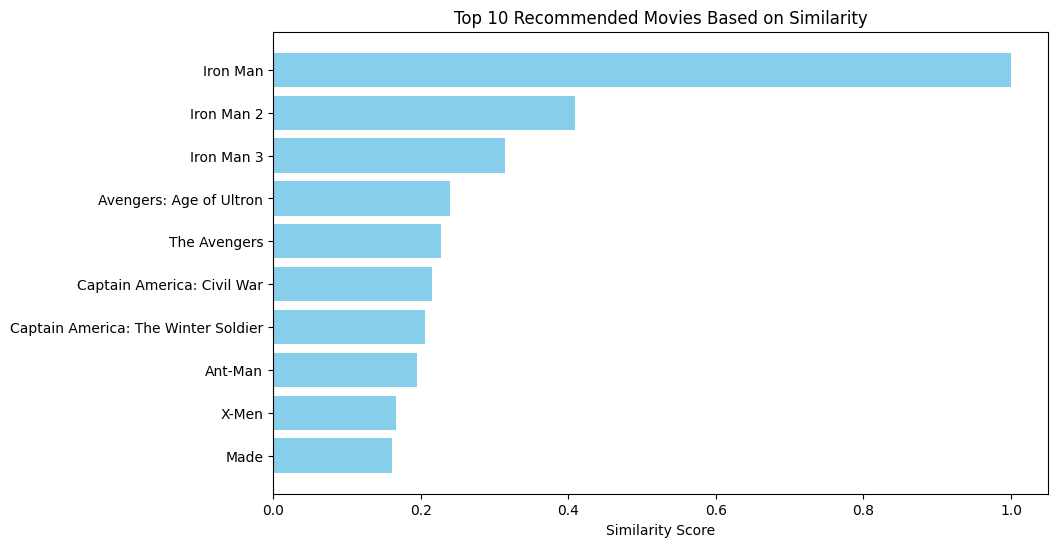

In [4]:
import matplotlib.pyplot as plt


recommended_titles = []
similarity_scores = []

for movie in sorted_movies[:10]:
    idx = movie[0]
    title = data[data.index == idx]["title"].values[0]
    score = movie[1]
    recommended_titles.append(title)
    similarity_scores.append(score)

plt.figure(figsize=(10, 6))
plt.barh(recommended_titles, similarity_scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top 10 Recommended Movies Based on Similarity')
plt.gca().invert_yaxis()
plt.show()


#Correlation between different movies recomended

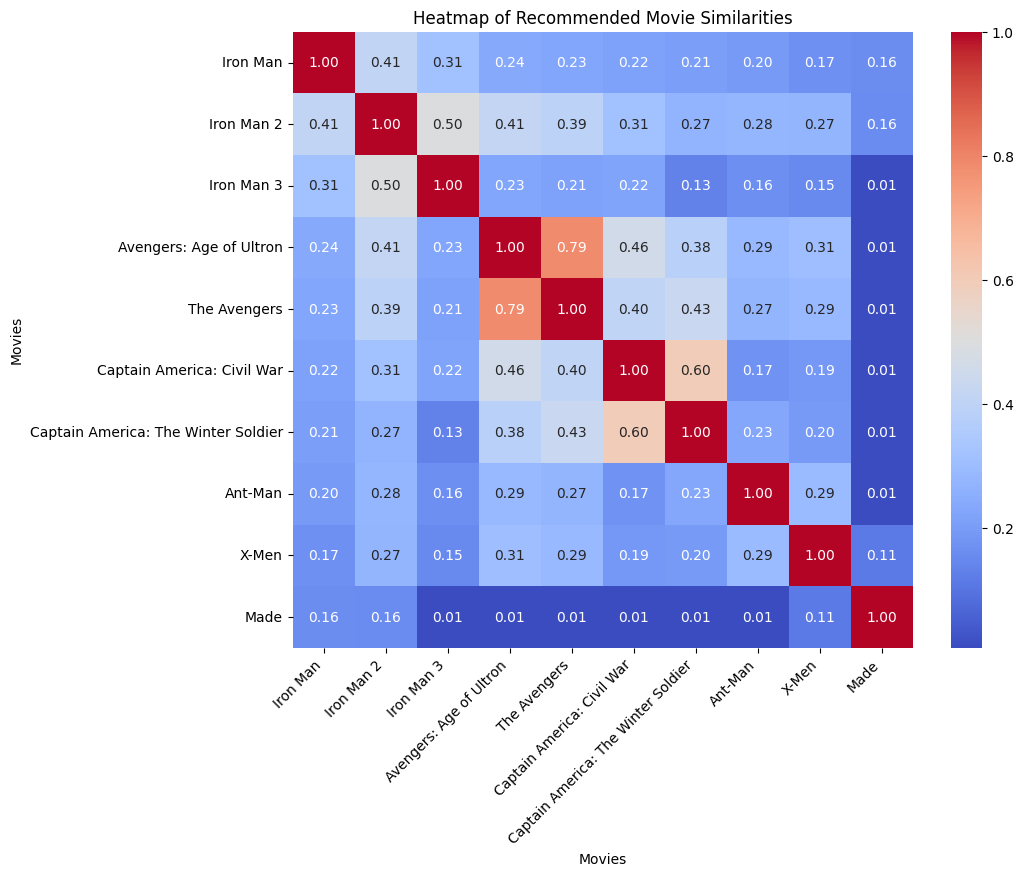

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


recommended_titles = []
recommended_indices = []

for movie in sorted_movies[:10]:
    idx = movie[0]
    title = data[data.index == idx]["title"].values[0]
    recommended_titles.append(title)
    recommended_indices.append(idx)


recommended = model[recommended_indices, :][:, recommended_indices]


similarity_df = pd.DataFrame(recommended, index=recommended_titles, columns=recommended_titles)


plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Recommended Movie Similarities")
plt.xlabel("Movies")
plt.ylabel("Movies")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
